# Assignment No:1
Image and Video Prosessing Name : Ajinkya Waghulikar 
Neptun : FGRQTC 
Question : Prewitt edge detector: gradient filter és nonmaxima-suppression (NMS) Output is two images: 1. gradient magnitute; 2. final result after NMS.

In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt, atan2, pi

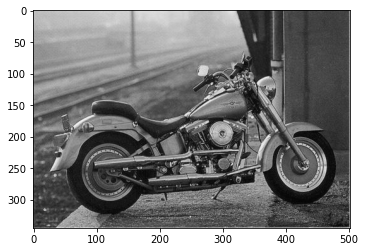

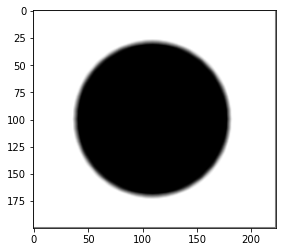

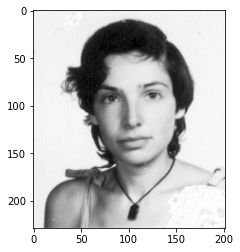

In [2]:
img = cv2.imread("motor.png", 0)
img1 = cv2.imread("circlegrey.png", 0)
img2= cv2.imread("julia.png", 0)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img1, cmap='gray')
plt.show()
plt.imshow(img2, cmap='gray')
plt.show()

In [3]:
def operator(m, operation_type):
    result = 0
    orientation = 0
    if operation_type == "Horizontal":
        for j in range(0,2):
            result += m[0][j]*-1 + m[2][j]
        result = result/3
    elif operation_type == "Vertical":
        for j in range(0,2):
            result += m[j][0]*-1 + m[j][2]
        result = result/3
    else:
        Fx = 0
        Fy = 0
        for j in range(0,2):
            Fx += m[j][0]*-1 + m[j][2]
            Fy += m[0][j]*-1 + m[2][j]
        Fx = Fx/3
        Fy = Fy/3
        result = sqrt((Fx)**2 + (Fy)**2)
        orientation = (atan2( Fy, Fx ) * 180) / pi
        
    return result, orientation

In [4]:
def NMS_operator(image, orient):
    output = image.copy()
    rows = image.shape[0]
    columns = image.shape[1]
    for i in range(0, image.shape[0]):
        for j in range(0,image.shape[1]):
            if (not (i < 1 or rows-i-1<1 or j < 1 or columns-j-1<1)):
                o = orient[i][j]
                if ((o<=22.5) & (o >= -22.5)) or (o>=157.5) or (o<=-157.5):
                    if not ((image[i][j-1] <= image[i][j]) & (image[i][j+1] <= image[i][j])):
                        output[i][j] = 0
                elif ((o<-22.5) and (o>=-67.5)) or ((o>112.5) and (o<=157.5)):
                    if not ((image[i-1][j+1] <= image[i][j]) & (image[i+1][j-1] <= image[i][j])):
                        output[i][j] = 0 
                elif ((o>67.5) and (o <= 112.5)) or ((o<-67.5) and (o>=-112.5)):
                    if not ((image[i+1][j] <= image[i][j]) & (image[i-1][j] <= image[i][j])):
                        output[i][j] = 0        
                elif ((o<-112.5) and (o>=-157.5)) or ((o>22.5) and (o <= 67.5)):
                    if not ((image[i-1][j-1] <= image[i][j]) & (image[i+1][j+1] <= image[i][j])):
                        output[i][j] = 0  
                
    return output

In [5]:
def Prewitt(image, operation_type, NMS):
    
    rows = image.shape[0]
    columns = image.shape[1]
    
    image_changed = np.zeros(image.shape)-1
    orient = np.zeros(image.shape)
    # 2.- Loop through the elments of the output image
    
    for i in range(0,image_changed.shape[0]):     
        for j in range(0,image_changed.shape[1]):
            if (not (i < 1 or rows-i-1<1 or j < 1 or columns-j-1<1)):
                image_changed[i][j], orient[i][j] = operator(image[i-1:i+1+1,j-1:j+1+1], operation_type)
    plt.imshow(image_changed, cmap="gray")
    plt.show()
    if NMS:
        image_changed = NMS_operator(image_changed, orient)
        plt.imshow(image_changed, cmap="gray")
        plt.show()
    
    return orient

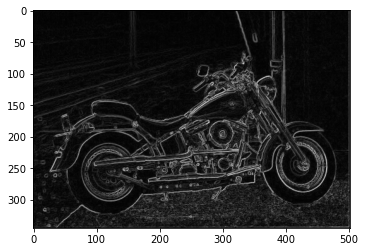

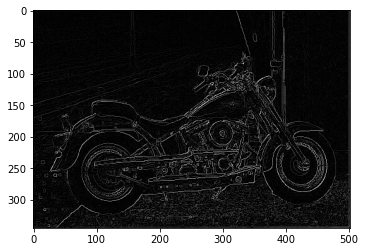

In [6]:
output_motor = Prewitt(img, "Gradient", True)

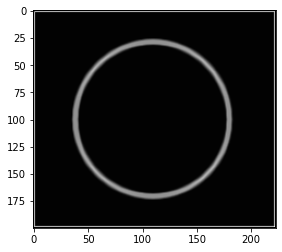

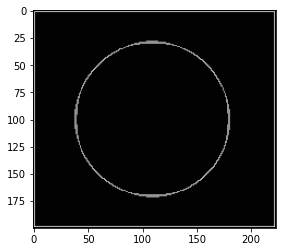

In [7]:
output_circlegrey = Prewitt(img1, "Gradient", True)

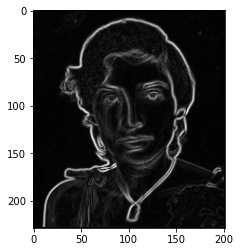

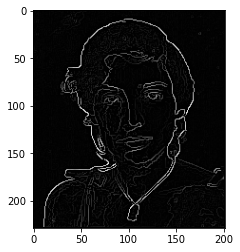

In [8]:
output_julia = Prewitt(img2, "Gradient", True)